<a href="https://colab.research.google.com/github/LydiaDEdou/CODSOFT/blob/main/AI_Task_4_RECOMMENDATION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# **Exploratory Data Analysis (EDA)**

**Load Data**

In [2]:


# Charger les jeux de données
df_ratings = pd.read_csv('u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
df_movies = pd.read_csv('u.item', sep='|', names=['movie_id', 'title'], usecols=[0, 1], encoding='latin-1')


df_ratings : Contains the ratings given by users to movies.


df_movies : Contains information about the movies.

**Data Overview**

In [3]:
# Display first few rows of ratings
print(df_ratings.head())

# Display first few rows of movies
print(df_movies.head())

# Display info about ratings
print(df_ratings.info())

# Display info about movies
print(df_movies.info())


   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596
   movie_id              title
0         1   Toy Story (1995)
1         2   GoldenEye (1995)
2         3  Four Rooms (1995)
3         4  Get Shorty (1995)
4         5     Copycat (1995)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   m

In [4]:
print(df_ratings.shape)

(100000, 4)


**Descriptive Statistics**

In [5]:
# Descriptive statistics of ratings
print(df_ratings.describe())

# Number of unique users and movies
num_users = df_ratings['user_id'].nunique()
num_movies = df_ratings['movie_id'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique movies: {num_movies}")


            user_id       movie_id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08
Number of unique users: 943
Number of unique movies: 1682


**Rating Distribution**

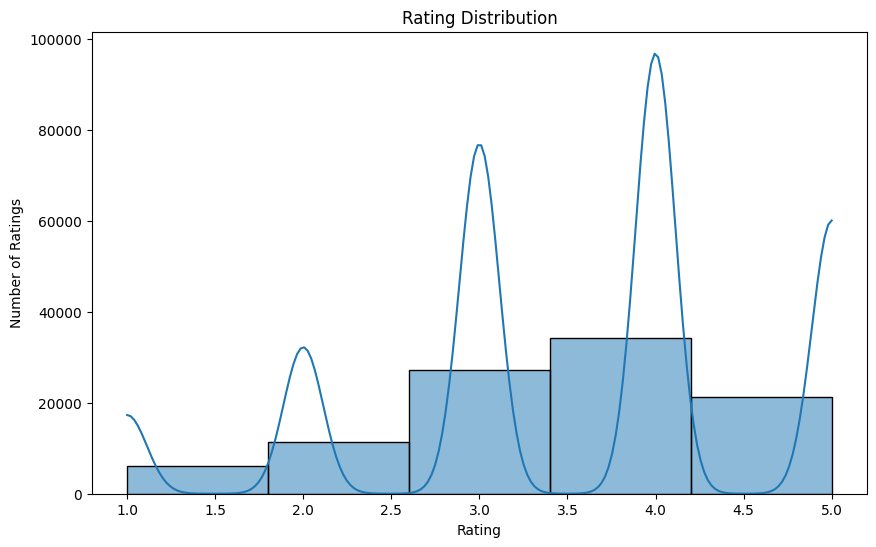

In [7]:

plt.figure(figsize=(10, 6))
sns.histplot(df_ratings['rating'], bins=5, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()


**Top Rated Movies**

In [8]:
# Count ratings per movie
movie_rating_counts = df_ratings['movie_id'].value_counts().head(10)
top_rated_movies = df_movies[df_movies['movie_id'].isin(movie_rating_counts.index)]

# Display top rated movies
print(top_rated_movies.merge(movie_rating_counts, left_on='movie_id', right_index=True))



     movie_id                          title  count
0           1               Toy Story (1995)    452
49         50               Star Wars (1977)    583
99        100                   Fargo (1996)    508
120       121  Independence Day (ID4) (1996)    429
180       181      Return of the Jedi (1983)    507
257       258                 Contact (1997)    509
285       286    English Patient, The (1996)    481
287       288                  Scream (1996)    478
293       294               Liar Liar (1997)    485
299       300           Air Force One (1997)    431


**Most Active Users**

In [9]:
# Count ratings per user
user_rating_counts = df_ratings['user_id'].value_counts().head(10)

# Display most active users
print(user_rating_counts)


user_id
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
Name: count, dtype: int64


**Missing Values**

In [10]:
# Check for missing values in df_ratings
print(df_ratings.isnull().sum())

# Check for missing values in df_movies
print(df_movies.isnull().sum())


user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64
movie_id    0
title       0
dtype: int64


**Duplicated data**


In [11]:
# Check for missing values in df_ratings
print(df_ratings.duplicated().sum())

# Check for missing values in df_movies
print(df_movies.duplicated().sum())

0
0


# **Creating User-Item Matrix**

user_item_matrix : Each row represents a user and each column represents a movie. The values are the ratings given by users to movies.

In [12]:
# Create a user-item matrix where rows are users and columns are movies
user_item_matrix = df_ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)


Creating the user_item_matrix is a fundamental step in building recommendation systems, particularly when using collaborative filtering techniques

In [13]:
print(user_item_matrix.head())
print(user_item_matrix.shape)

movie_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                               ...   
1          5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2          4.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0  ...   
3          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5          4.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

movie_id  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
user_id                                                               
1          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5          0.0   0.0   0.0   0.0  

# **cosine_similarity**

In [14]:
# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)


cosine_similarity : Calculates the cosine similarity between the vectors of each user.

# **Recommendation based on collaborative filtering**


* user_idx : Index of the user for whom we are making recommendations.  
* user_scores : Movie scores calculated based on user similarity.

* top_indices : Indices of the highest scored movies.
* top_movie_ids : IDs of the recommended movies.
* recommend_movies : Function to recommend movies based on user similarity.

In [15]:
def recommend_movies(user_id, user_item_matrix, user_similarity, df_movies, top_n=10):
    user_idx = user_item_matrix.index.get_loc(user_id)  # Find the index of the user
    user_scores = user_similarity[user_idx].dot(user_item_matrix) / np.array([np.abs(user_similarity[user_idx]).sum(axis=0)])  # Calculate movie scores
    top_indices = user_scores.argsort()[::-1][:top_n]  # Get the indices of the highest scored movies
    top_movie_ids = user_item_matrix.columns[top_indices]  # Get the IDs of the recommended movies
    return df_movies[df_movies['movie_id'].isin(top_movie_ids)]['title']  # Return the titles of the recommended movies

# Recommend movies for user 1

print("Recommend movies for user 1")
recommendations = recommend_movies(1, user_item_matrix, user_similarity, df_movies)
print(recommendations)

# Recommend movies for user 300

print("\n Recommend movies for user 300")
recommendations = recommend_movies(300, user_item_matrix, user_similarity, df_movies)
print(recommendations)


Recommend movies for user 1
0                      Toy Story (1995)
49                     Star Wars (1977)
55                  Pulp Fiction (1994)
97     Silence of the Lambs, The (1991)
99                         Fargo (1996)
126               Godfather, The (1972)
171     Empire Strikes Back, The (1980)
172          Princess Bride, The (1987)
173      Raiders of the Lost Ark (1981)
180           Return of the Jedi (1983)
Name: title, dtype: object

 Recommend movies for user 300
49                Star Wars (1977)
99                    Fargo (1996)
180      Return of the Jedi (1983)
257                 Contact (1997)
285    English Patient, The (1996)
287                  Scream (1996)
293               Liar Liar (1997)
299           Air Force One (1997)
312                 Titanic (1997)
327       Conspiracy Theory (1997)
Name: title, dtype: object


# **Recommendation Based on Content Filtering**

In [17]:



# Load movie details
movie_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'Action', 'Adventure', 'Animation',
              'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
              'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df_movies = pd.read_csv('u.item', sep='|', encoding='latin-1', names=movie_cols, usecols=range(24))

# Create a 'genres' column by concatenating the genre names for each movie
genre_columns = movie_cols[5:]
df_movies['genres'] = df_movies[genre_columns].apply(lambda x: ' '.join([genre for genre in genre_columns if x[genre] == 1]), axis=1)

# Fill any missing genre information with an empty string
df_movies['genres'] = df_movies['genres'].fillna('')

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Transform the genres into TF-IDF vectors
tfidf_matrix = tfidf.fit_transform(df_movies['genres'])

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to recommend movies based on content similarity
def recommend_movies_content_based(movie_title, df_movies, cosine_sim, top_n=10):
    idx = df_movies[df_movies['title'] == movie_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]
    return df_movies['title'].iloc[movie_indices]

# Example: Recommend movies similar to 'Star Wars (1977)'
content_recommendations = recommend_movies_content_based('Star Wars (1977)', df_movies, cosine_sim)
print(content_recommendations)



180                        Return of the Jedi (1983)
171                  Empire Strikes Back, The (1980)
270                         Starship Troopers (1997)
120                    Independence Day (ID4) (1996)
234                             Mars Attacks! (1996)
61                                   Stargate (1994)
81                              Jurassic Park (1993)
221                  Star Trek: First Contact (1996)
226    Star Trek VI: The Undiscovered Country (1991)
227              Star Trek: The Wrath of Khan (1982)
Name: title, dtype: object


In [19]:
content_recommendations = recommend_movies_content_based('Toy Story (1995)', df_movies, cosine_sim)
print(content_recommendations)


421                Aladdin and the King of Thieves (1996)
101                                Aristocats, The (1970)
403                                      Pinocchio (1940)
624                        Sword in the Stone, The (1963)
945                         Fox and the Hound, The (1981)
968           Winnie the Pooh and the Blustery Day (1968)
1065                                         Balto (1995)
1077                              Oliver & Company (1988)
1408                            Swan Princess, The (1994)
1411    Land Before Time III: The Time of the Great Gi...
Name: title, dtype: object
